In [1]:
import networkx as nx
import ibm_db
import ibm_db_dbi
import pandas as pd
from pyvis.network import Network

In [2]:
#conectando ao BigSql
#COLOCAR CREDENCIAIS para acessar o banco
user = "XXXX"
pwd = "XXXXX"
db = ibm_db.connect("DATABASE=BIGSQL;HOSTNAME=bigsql.pro.intra.rs.gov.br;PORT=32051;PROTOCOL=TCPIP;UID="+user+";PWD="+pwd+";", "", "")
conn = ibm_db_dbi.Connection(db) 

In [3]:
# id_pi -> número pessoa de interesse
def criando_grafo(id_pi):
    query = """  SELECT 
                    pi1.NRO_INT_PESSOA_INTERESSE pessoa1,
                    pi2.NRO_INT_PESSOA_INTERESSE pessoa2,
                    gp.TXT_DESCRICAO Grau
            FROM 
                  GESEG_TARGET.GESEG_REL_VINCULO_PESSOAL rp
                  INNER JOIN GESEG_TARGET.GESEG_VER_PESSOA_INTERESSE pi1 ON rp.NRO_INT_PESSOA_INTERESSE = pi1.NRO_INT_PESSOA_INTERESSE
                  INNER JOIN GESEG_TARGET.GESEG_VER_PESSOA_INTERESSE pi2 ON rp.NRO_INT_PESSOA_INTERESSE_RELACAO = pi2.NRO_INT_PESSOA_INTERESSE
                  INNER JOIN GESEG_TARGET.GESEG_DIM_GRAU_VINCULO_PESSOAL gp ON gp.NRO_INT_GRAU_VINCULO_PESSOAL = rp.NRO_INT_GRAU_VINCULO_PESSOAL   
                  --WHERE pi1.NOME LIKE '%BEJAR'
            WHERE pi1.NRO_INT_PESSOA_INTERESSE = """+id_pi+""";"""
    
    df = pd.read_sql_query(query, conn)
    # alterando os nomes das colunas para letras minúsculas
    df.rename(str.lower, axis='columns', inplace = True)
    #informando quais colunas da tabela serão o source, target e demais atributos;
    D = nx.from_pandas_edgelist(df, source = 'pessoa1', target = 'pessoa2', edge_attr=['grau'], create_using=nx.DiGraph())

    # buscando nomes para atribuir aos nós
    query = """  SELECT 
                    pi1.NRO_INT_PESSOA_INTERESSE pessoa1,
                    pi1.nome nome_source,
                    pi2.NRO_INT_PESSOA_INTERESSE pessoa2,
                    pi2.NOME nome_target
            FROM 
                  GESEG_TARGET.GESEG_REL_VINCULO_PESSOAL rp
                  INNER JOIN GESEG_TARGET.GESEG_VER_PESSOA_INTERESSE pi1 ON rp.NRO_INT_PESSOA_INTERESSE = pi1.NRO_INT_PESSOA_INTERESSE
                  INNER JOIN GESEG_TARGET.GESEG_VER_PESSOA_INTERESSE pi2 ON rp.NRO_INT_PESSOA_INTERESSE_RELACAO = pi2.NRO_INT_PESSOA_INTERESSE
                  INNER JOIN GESEG_TARGET.GESEG_DIM_GRAU_VINCULO_PESSOAL gp ON gp.NRO_INT_GRAU_VINCULO_PESSOAL = rp.NRO_INT_GRAU_VINCULO_PESSOAL   
                  --WHERE pi1.NOME LIKE '%BEJAR'
            WHERE pi1.NRO_INT_PESSOA_INTERESSE ="""+id_pi+""";"""
    
    #TRANSFERINDO DADOS PARA TABELA
    df_node = pd.read_sql_query(query, conn)
    df_node.rename(str.lower, axis='columns', inplace = True)
    
    df_nomes1 = df_node[['pessoa1','nome_source']]
    df_nomes1 = df_nomes1.drop_duplicates()
    df_nomes1.rename(columns={'pessoa1': 'id','nome_source': 'nome'}, inplace = True)

    df_nomes2 = df_node.loc[:,'pessoa2':'nome_target'].copy()
    df_nomes2.rename(columns={'pessoa2': 'id','nome_target': 'nome'}, inplace = True)
    
    df_nomes3 = df_nomes1.append(df_nomes2)
    df_nomes3['label'] = df_nomes3['nome']
    df_nomes3['title'] = df_nomes3['id']
    
    #transformando a tabela em um dicionário para atribuir os dados dos vértices 'ocorrencia'
    node_ocorr_atb = df_nomes3.set_index("id").T.to_dict()
    # atributo 
    nx.set_node_attributes(D, node_ocorr_atb)
    
    return D;

In [4]:
# Criando grafo 'Rodrigo'
id_pi = """'2D074B8B5A9C75450D9E1E8D2AF50F59'"""
G = criando_grafo(id_pi)
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(G)
nt.show("g.html")

In [5]:
# Criando grafo 'Maria de Lourdes'
id_pi = """'3F8515C0DA2FD112919A153903EE691C'"""
M = criando_grafo(id_pi)
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(M)
nt.show("m.html")

In [6]:
# Unindo os grafos
U= nx.compose(G, M)
# plotar o grafo completo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(U)
nt.show("u.html")

In [7]:
# Criando grafo 'Rafael'
id_pi = """'30253C0CFBD96A5FC1A7D9D5EAB82A9F'"""
R = criando_grafo(id_pi)
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(R)
nt.show("r.html")

In [8]:
# Unindo os grafos
U2= nx.compose(U, R)
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(U2)
nt.show("u2.html")

In [9]:
# Criando grafo 'Diego'
id_pi = """'A11F0D6AD28B9C703662BA9C211B1630'"""
X = criando_grafo(id_pi)
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(X)
nt.show("x.html")

In [10]:
# Unindo os grafos
U3= nx.compose(U2, X)

In [11]:
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(U3)
nt.show("u3.html")

In [12]:
# Criando grafo 'Marcos'
id_pi = """'7AF7AF93CC5D80373B325B03417A520B'"""
Y = criando_grafo(id_pi)
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.from_nx(Y)
nt.show("y.html")

In [13]:
# Unindo os grafos
U4= nx.compose(U3, Y)
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.show_buttons(filter_=['physics'])
nt.from_nx(U4)
nt.show("u4.html")

In [14]:
#Criando Grafo 'Ernesto'
id_pi = """'23882729F94FFFBDDF84C03B71A2455C'"""
N = criando_grafo(id_pi)
# Unindo os grafos
U5= nx.compose(U4, N)

In [15]:
#Criando Grafo 'Elisabeth'
id_pi = """'DBAF112D1B531F9777A4068C0E4314AF'"""
S = criando_grafo(id_pi)
# Unindo os grafos
U6= nx.compose(U5, S)

In [16]:
#Criando Grafo 'Roberto'
id_pi = """'1BB355F3641E2B3452F0686A90D12693'"""
T = criando_grafo(id_pi)
# Unindo os grafos
U7= nx.compose(U6, T)

In [17]:
# plotar o grafo
nt = Network(height='750px', width='100%', notebook = True, directed = False)
nt.show_buttons(filter_=['physics'])
nt.from_nx(U7)
nt.show("u7.html")

### Particões

In [57]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [60]:
U8 = nx.to_undirected(U7)
partition = community_louvain.best_partition(U8)
print(partition)


{'2D074B8B5A9C75450D9E1E8D2AF50F59': 0, '3F8515C0DA2FD112919A153903EE691C': 0, '11813F51695CD30C92D05791F5995BF0': 0, 'DBAF112D1B531F9777A4068C0E4314AF': 1, 'CBEA14EF288319E0C3D62055BAEC0FD0': 0, '30253C0CFBD96A5FC1A7D9D5EAB82A9F': 0, '2513A38636588A83F4E2074F0DBA4324': 0, 'D111260B5769F46B3F514D6278B6753D': 0, 'A11F0D6AD28B9C703662BA9C211B1630': 0, '23882729F94FFFBDDF84C03B71A2455C': 1, '1BB355F3641E2B3452F0686A90D12693': 1, '7AF7AF93CC5D80373B325B03417A520B': 1, '0776CBBA405673950F40651D605CE0F6': 1, '9D9F092E63B8D321DBF22DCA0CC88158': 1, '7F743034AEDB95D6011CAAB9EEDBB03D': 1, 'DD1478CE87B43137E9D32A8DF74DC719': 1}


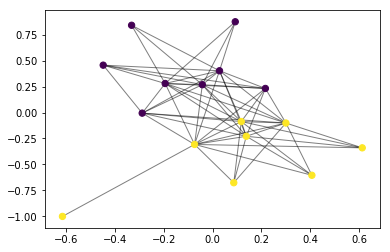

In [61]:
pos = nx.spring_layout(U8)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(U8, pos, partition.keys(), node_size=40, 
                        cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(U8, pos, alpha=0.5)
plt.show()

In [65]:
conn.close()

True